# Implementación de K-Nearest Neigbors (KNN) para el conjunto de datos Iris

## Acerca del conjunto de datos
El conjunto de datos Iris fue utilizado en el clásico artículo de R.A. Fisher de 1936, "El uso de mediciones múltiples en problemas taxonómicos", y también se puede encontrar en el Repositorio de Aprendizaje Automático de UCI. Incluye tres especies de iris con 50 muestras cada una, así como algunas propiedades de cada flor. Una especie de flor es linealmente separable de las otras dos, pero las otras dos no son linealmente separables entre sí.

Las columnas en este conjunto de datos son:
- **Id**: Es un identificador único para cada muestra en el conjunto de datos.
- **SepalLengthCm:** La longitud del sépalo de la flor de iris en centímetros.
- **SepalWidthCm:** El ancho del sépalo de la flor de iris en centímetros.
- **PetalLengthCm:** La longitud del pétalo de la flor de iris en centímetros.
- **PetalWidthCm:** El ancho del pétalo de la flor de iris en centímetros.
- **Species:** La especie de la flor de iris. Este es el atributo objetivo que intentaremos predecir basándonos en las otras características.

## Lineamientos de la parte práctica
- **1. Implementación del modelo:**
    - Utiliza la biblioteca scikit-learn para implementar KNN.
    - Muestra cómo importar las clases necesarias y crear una instancia del modelo.
- **2. Ejemplo de aplicación:**
    - Demuestra cómo cargar y preprocesar los datos.
- **3. Hiperparámetros del modelo:**
    - Explica y muestra cómo ajustar los principales hiperparámetros de KNN:
        - n_neighbors (k): El número de vecinos a considerar.
        - weights: 'uniform' vs 'distance'.
        - metric: Diferentes métricas de distancia (euclidiana, manhattan, etc.).
- **4. Visualización de la frontera de decisión de KNN:**
    - Visualiza cómo cambia la frontera de decisión con diferentes valores de k.
- **5. Métricas de evaluación:**
    - Utiliza métricas como precisión, recall, F1-score y matriz de confusión.
    - Muestra cómo calcular e interpretar estas métricas usando scikit-learn.
- **6. Visualización:**
    - Utiliza matplotlib o seaborn para crear gráficos que ilustren el funcionamiento de KNN y el impacto de los hiperparámetros.

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite



## 1. Implementación del modelo KNN

En esta sección, implementaremos el modelo K-Nearest Neighbors (KNN) utilizando la biblioteca scikit-learn. Primero, importaremos las clases necesarias y cargaremos nuestro conjunto de datos Iris.

```python

```

In [2]:
# Importamos las bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargamos el conjunto de datos Iris
iris_df = pd.read_csv('/kaggle/input/iris/Iris.csv')

# Separamos las características (X) y la variable objetivo (y)
X = iris_df.drop(['Species', 'Id'], axis=1)
y = iris_df['Species']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos una instancia del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo
knn.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.2f}")

Precisión del modelo KNN: 1.00



En el anterior bloque de código, hemos realizado los siguientes pasos:

1. Importamos las clases necesarias de scikit-learn.
2. Cargamos el conjunto de datos Iris desde el archivo CSV.
3. Separamos las características (X) y la variable objetivo (y).
4. Dividimos los datos en conjuntos de entrenamiento y prueba.
5. Creamos una instancia del modelo KNN con 5 vecinos.
6. Entrenamos el modelo con los datos de entrenamiento.
7. Realizamos predicciones en el conjunto de prueba.
8. Calculamos la precisión del modelo.

## 2. Exploración, visualización y normalización de los datos
A continuación vamos a explorar y visualizar los datos con los que estamos trabajando en el conjunto de datos y opcionalmente agregar un bloque de código para la normalización de los datos lo que nos permitirá medir el desempeño del modelo con datos normalizados y no normalizados.

### 2.1. Exploración de los datos
En el siguiente bloque vamos a ejecutar una exploración inicial de los datos para entender el conjunto con el cual estamos entrenando nuestro modelo de KNN.

In [3]:
# Mostramos las primeras filas del conjunto de datos
print(iris_df.head())

# Información general sobre el conjunto de datos
print(iris_df.info())

# Estadísticas descriptivas
print(iris_df.describe())

# Conteo de cada especie
print(iris_df['Species'].value_counts())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               

#### Interpretación de los resultados
Basados en los resultados obtenidos en el bloque de exploración, podemos establecer lo siguiente:

- **1. Estructura del conjunto de datos:**
    - El conjunto de datos contiene 150 muestras con 6 columnas: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm y Species.
    - No hay valores nulos en ninguna de las columnas, lo que es excelente para el análisis.
- **2. Distribución de especies:**
    - Hay 50 muestras para cada una de las tres especies de iris: setosa, versicolor y virginica. Esto indica un conjunto de datos equilibrado.
- **3. Estadísticas descriptivas:**
    - La longitud del sépalo varía entre 4.3 cm y 7.9 cm, con una media de 5.84 cm.
    - El ancho del sépalo varía entre 2.0 cm y 4.4 cm, con una media de 3.05 cm.
    - La longitud del pétalo varía entre 1.0 cm y 6.9 cm, con una media de 3.76 cm.
    - El ancho del pétalo varía entre 0.1 cm y 2.5 cm, con una media de 1.20 cm.

Por lo tanto,

- Hay una variación considerable en las medidas de pétalos y sépalos entre las diferentes especies.
- La longitud y ancho del pétalo parecen tener una mayor variación que las medidas del sépalo, lo que podría ser útil para la clasificación.

### 2.2 Visualización de los datos
En el siguiente bloque vamos a visualizar los datos previamente explorados.

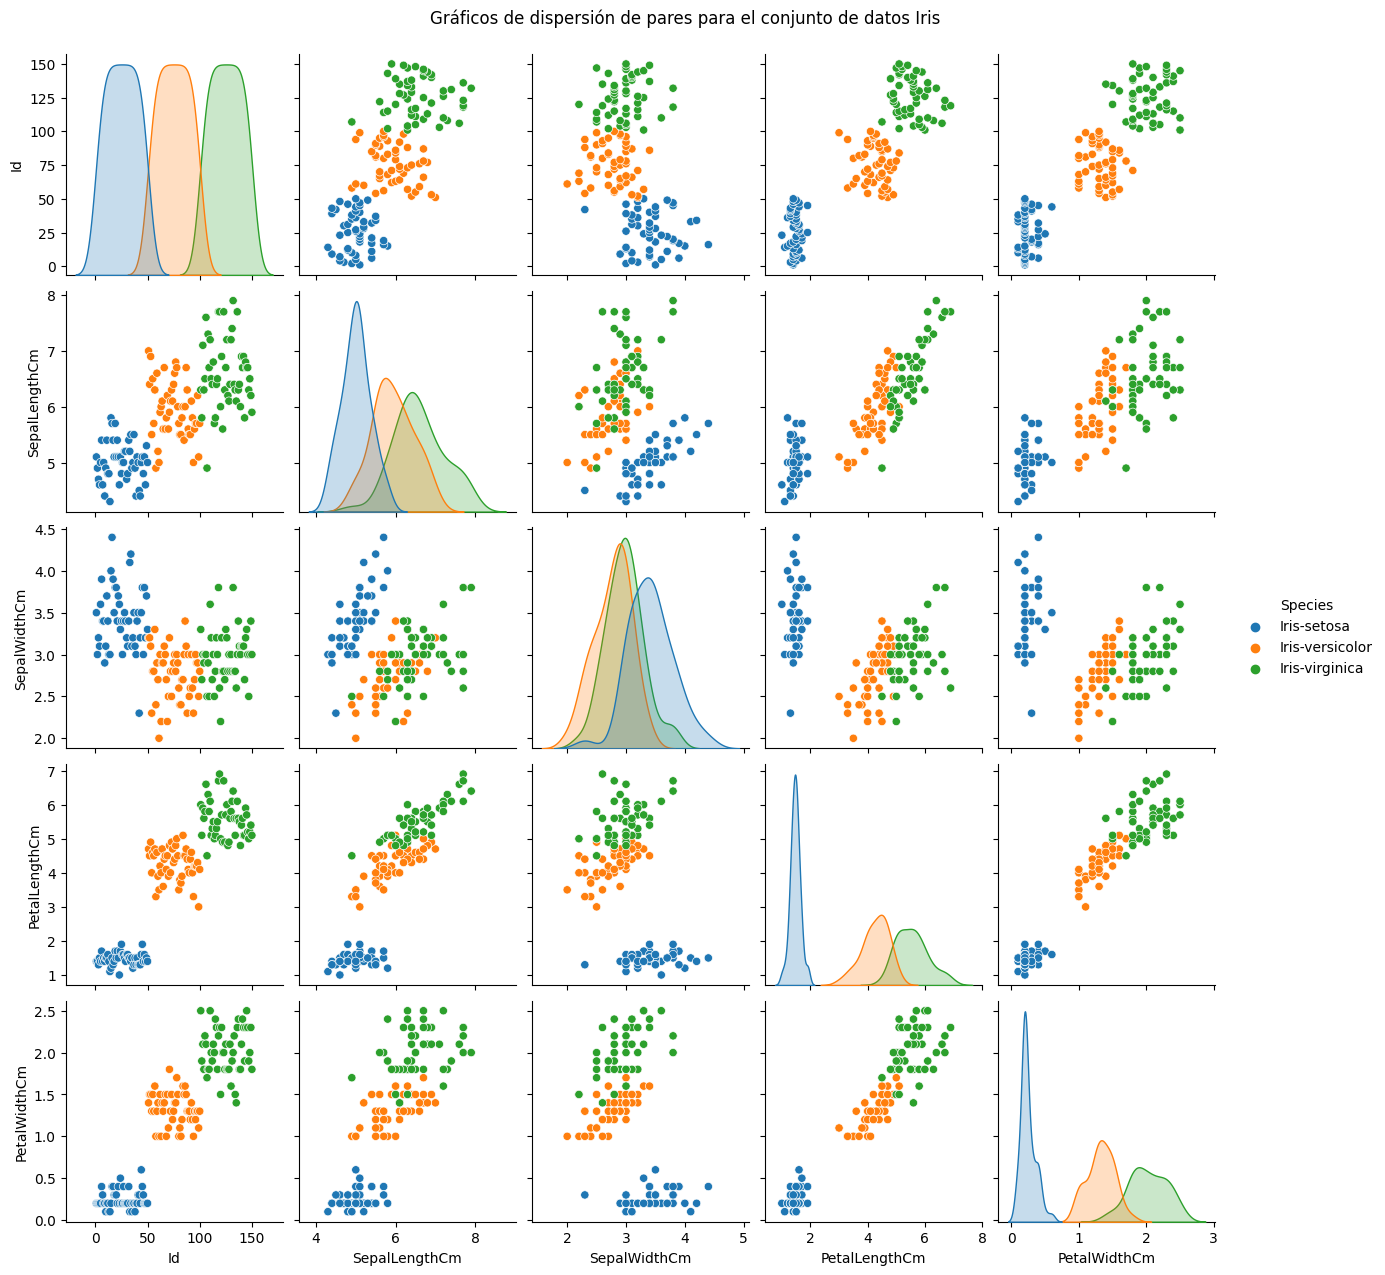

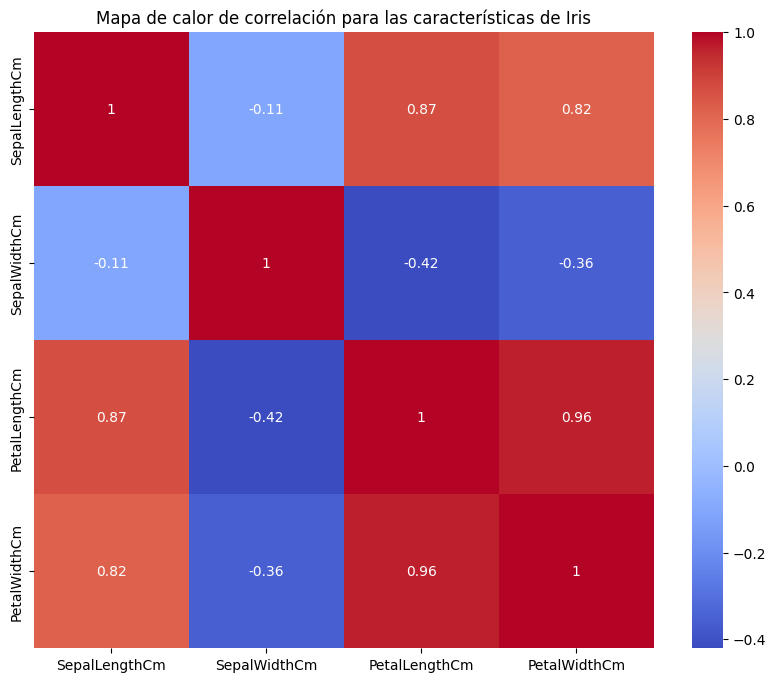

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Creamos un par de gráficos de dispersión
g = sns.pairplot(iris_df, hue='Species', height=2.5)
g.fig.suptitle("Gráficos de dispersión de pares para el conjunto de datos Iris", y=1.02)
plt.show()

# Creamos un mapa de calor de correlación
plt.figure(figsize=(10,8))
# Excluimos 'Id' y 'Species' del cálculo de correlación
correlation_matrix = iris_df.drop(['Id', 'Species'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlación para las características de Iris")
plt.show()

#### Interpretación de resultados
Al observar los gráficos de dispersión de pares y el mapa de calor de correlación podemos afirmar lo siguiente:

- **Separación de especies:** Se puede ver claramente que la especie Iris-setosa (azul) está bien separada de las otras dos especies en la mayoría de las dimensiones, especialmente en las características relacionadas con los pétalos.
- **Superposición:** Iris-versicolor (naranja) e Iris-virginica (verde) muestran cierta superposición en varias dimensiones, lo que sugiere que podrían ser más difíciles de distinguir entre sí.
- **Distribuciones:** Las distribuciones de cada característica varían entre las especies, con Iris-setosa generalmente mostrando valores más bajos en longitud y ancho de pétalos.
- **Correlaciones:** Se observan correlaciones positivas fuertes entre la longitud y el ancho de los pétalos, así como entre la longitud del pétalo y la longitud del sépalo. Esto se explica a detalle con el mapa de calor de correlación.
- **Correlación fuerte positiva (0.96) entre PetalLengthCm y PetalWidthCm:** Esto indica que a medida que aumenta la longitud del pétalo, también tiende a aumentar su ancho de manera muy consistente.
- **Correlación fuerte positiva (0.87) entre SepalLengthCm y PetalLengthCm:** Sugiere que las flores con sépalos más largos tienden a tener pétalos más largos.
- **Correlación moderada positiva (0.82) entre SepalLengthCm y PetalWidthCm:** Indica una relación similar a la anterior, pero ligeramente menos fuerte.
- **Correlaciones negativas débiles (-0.11, -0.36, -0.42) entre SepalWidthCm y las otras características:** Esto sugiere que a medida que el ancho del sépalo aumenta, las otras medidas tienden a disminuir ligeramente, aunque la relación no es muy fuerte.

### 2.3 Normalización de los datos
En el siguiente bloque, el cual es opcional, con fines de identificar el impacto de la normalización en el desempeño del modelo, se normaliza el conjunto de datos, haga la normalización de los datos una vez que haya ejecutado todo el cuaderno, guarde todos sus resultados a partir de este punto y realice la normalización, repita el proceso y compare.

In [20]:
from sklearn.preprocessing import StandardScaler

# Normalizamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Actualizamos X_train y X_test con los datos normalizados
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### Nota
Algunos algoritmos, como KNN, que se basan en distancias entre puntos, pueden beneficiarse significativamente de la normalización, especialmente cuando las características tienen escalas muy diferentes. Es por ello que se deja este bloque con el cual podrá normalizar el conjunto, y comparar, **recuerde hacerlo al final de todo el proceso** cuando tenga todos sus resultados sin haber normalizado el conjunto de datos.

## 3. Hiperparámetros del modelo KNN
El algoritmo K-Nearest Neighbors (KNN) tiene varios hiperparámetros que pueden ajustarse para optimizar su rendimiento. A continuación, explicaremos los principales hiperparámetros y cómo ajustarlos:

### 3.1 n_neighbors (k)
Este es el hiperparámetro más importante de KNN. Determina el número de vecinos más cercanos a considerar para la clasificación o regresión.

- Un valor k más pequeño puede capturar patrones más locales pero es más sensible al ruido.
- Un valor k más grande suaviza las predicciones pero puede perder patrones locales importantes.

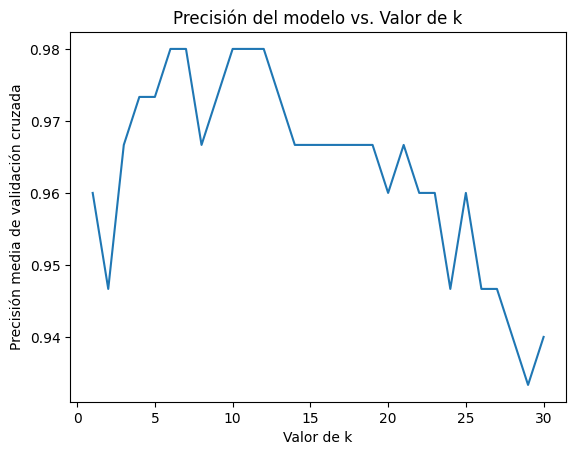

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

plt.plot(k_values, cv_scores)
plt.xlabel('Valor de k')
plt.ylabel('Precisión media de validación cruzada')
plt.title('Precisión del modelo vs. Valor de k')
plt.show()

#### Interpretación de resultados
Basado en la gráfica podemos observar lo siguiente:

- La precisión del modelo varía considerablemente a medida que cambia el valor de k.
- Los valores más altos de precisión se observan para k entre 5 y 10, con picos alrededor de k=5 y k=9.
- Hay una tendencia general a la disminución de la precisión a medida que k aumenta más allá de 10.
- La precisión más baja se observa cuando k se acerca a 30.
- Hay algunas fluctuaciones notables en la precisión, especialmente en los valores más bajos de k.

Parece que los valores óptimos de k para este conjunto de datos Iris estarían en el rango de 5 a 10. Esto sugiere que considerar entre 5 y 10 vecinos más cercanos proporciona el mejor equilibrio entre capturar patrones locales y evitar el sobreajuste para este conjunto de datos específico.

### 3.2 weights
Este hiperparámetro determina cómo se ponderan los vecinos al hacer predicciones.
- **uniform:** Todos los vecinos tienen el mismo peso.
- **distance:** Los vecinos más cercanos tienen más influencia que los más lejanos.

In [7]:
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

score_uniform = cross_val_score(knn_uniform, X, y, cv=5).mean()
score_distance = cross_val_score(knn_distance, X, y, cv=5).mean()

print(f"Precisión con pesos uniformes: {score_uniform:.4f}")
print(f"Precisión con pesos por distancia: {score_distance:.4f}")

Precisión con pesos uniformes: 0.9733
Precisión con pesos por distancia: 0.9667


#### Interpretación de resultados
La precisión es ligeramente mayor con pesos uniformes. Esto sugiere que, para este conjunto de datos, dar el mismo peso a todos los vecinos funciona un poco mejor que ponderar por distancia. Sin embargo, la diferencia es pequeña (0.0066), lo que indica que ambos métodos son efectivos.

### 3.3 metric
Este hiperparámetro define cómo se calcula la distancia entre los puntos.

- **Euclidiana:** La distancia en línea recta entre dos puntos.
- **Manhattan:** La suma de las diferencias absolutas de las coordenadas.
- **Minkowski:** Una generalización de las distancias Euclidiana y Manhattan.

In [8]:
metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    score = cross_val_score(knn, X, y, cv=5).mean()
    print(f"Precisión con métrica {metric}: {score:.4f}")

Precisión con métrica euclidean: 0.9733
Precisión con métrica manhattan: 0.9600
Precisión con métrica minkowski: 0.9733


#### Interpretación de resultados
Las métricas Euclidiana y Minkowski obtienen la misma precisión, que es ligeramente superior a la de Manhattan. Esto no es sorprendente, ya que la métrica de Minkowski es una generalización de las otras dos (con p=2 es equivalente a la Euclidiana, y con p=1 a la Manhattan).

### 3.4 Otros hiperparámetros
Existen otros hiperparámetros menos comúnmente ajustados, pero que pueden ser útiles en ciertos casos:

- **algorithm:** 'auto', 'ball_tree', 'kd_tree', o 'brute'. Determina el algoritmo utilizado para calcular los vecinos más cercanos.
- **leaf_size:** Afecta la velocidad de construcción y consulta de los árboles, así como el consumo de memoria de los algoritmos ball_tree y kd_tree.
- **p:** Parámetro de potencia para la métrica de Minkowski. p=1 equivale a Manhattan, p=2 a Euclidiana.

Para ajustar estos hiperparámetros, se recomienda utilizar técnicas como la validación cruzada y la búsqueda en cuadrícula (GridSearchCV) o la búsqueda aleatoria (RandomizedSearchCV) de scikit-learn.

### 3.5. Elección de los mejores hiperpárametros
A continuación se elegirán los mejores hiperpárametros entre todos los comúnmente evaluados.

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Mejor puntuación: 0.9866666666666667


#### Interpretación de resultados

En general, estos resultados muestran que el modelo KNN está funcionando muy bien para el conjunto de datos Iris, con precisiones superiores al 96% en todos los casos.

### 4. Visualización de la frontera de decisión de KNN
En esta sección, visualizaremos cómo cambia la frontera de decisión del modelo KNN con diferentes valores de k. Utilizaremos dos características del conjunto de datos Iris para crear un gráfico de dispersión bidimensional y mostraremos las fronteras de decisión para diferentes valores de k.

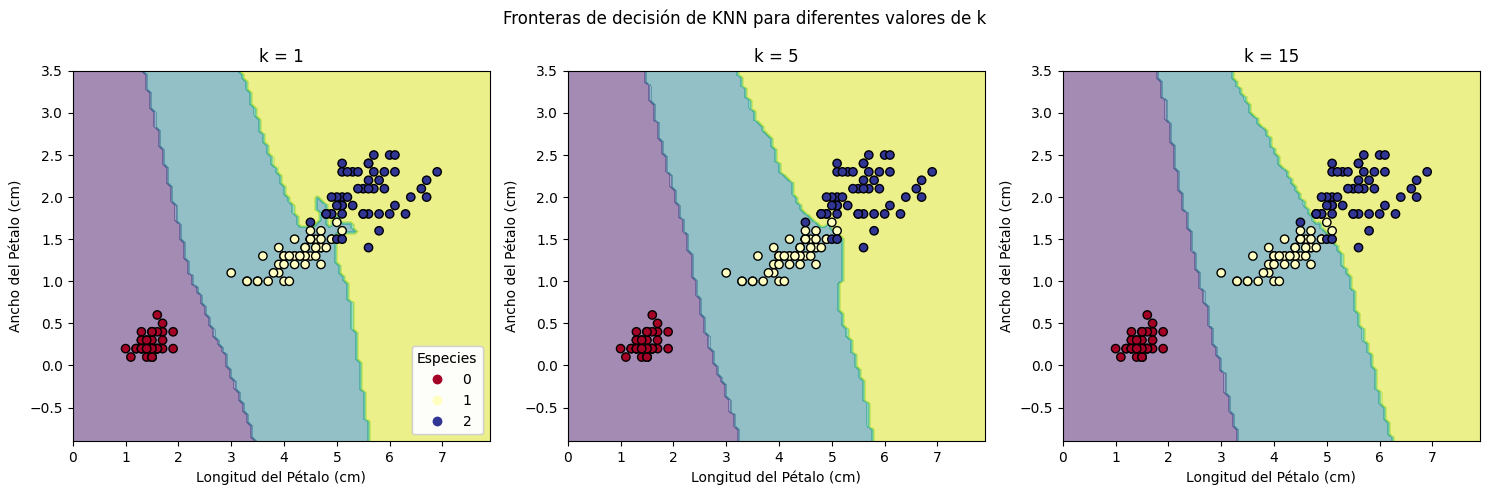

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

# Seleccionamos dos características para la visualización
X = iris_df[['PetalLengthCm', 'PetalWidthCm']].values
y = iris_df['Species'].values

# Codificamos las etiquetas de las especies a valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Definimos los valores de k que queremos visualizar
k_values = [1, 5, 15]

# Creamos una figura con subplots para cada valor de k
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Fronteras de decisión de KNN para diferentes valores de k')

for i, k in enumerate(k_values):
    # Creamos y entrenamos el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y_encoded)
    
    # Visualizamos la frontera de decisión
    DecisionBoundaryDisplay.from_estimator(
        knn,
        X,
        response_method="predict",
        ax=axs[i],
        alpha=0.5
    )
    
    # Graficamos los puntos de datos
    scatter = axs[i].scatter(X[:, 0], X[:, 1], c=y_encoded, edgecolor="black", cmap=plt.cm.RdYlBu)
    axs[i].set_title(f'k = {k}')
    axs[i].set_xlabel('Longitud del Pétalo (cm)')
    axs[i].set_ylabel('Ancho del Pétalo (cm)')

# Añadimos una leyenda
legend1 = axs[0].legend(*scatter.legend_elements(),
                        loc="lower right", title="Especies")
axs[0].add_artist(legend1)

plt.tight_layout()
plt.show()

#### Interpretación de resultados
En las anteriores gráficas podemos observar:

- **Para k=1:** La frontera de decisión es muy irregular y se ajusta estrechamente a los puntos individuales. Esto puede llevar a un sobreajuste, ya que el modelo es muy sensible a puntos individuales y al ruido en los datos.
- **Para k=5:** La frontera de decisión es más suave que con k=1, pero aún captura patrones locales en los datos. Este valor parece proporcionar un buen equilibrio entre ajuste y generalización.
- **Para k=15:** La frontera de decisión es aún más suave y generalizada. Esto puede ser beneficioso para evitar el sobreajuste, pero podría perder algunos patrones locales importantes en los datos.

Las tres especies de iris (representadas por los colores rojo, amarillo y azul) parecen ser bastante separables en el espacio de características de longitud y ancho del pétalo.
La especie representada en rojo (probablemente Iris setosa) es fácilmente separable de las otras dos.
Las otras dos especies (probablemente Iris versicolor e Iris virginica) muestran cierta superposición, lo que explica por qué el modelo puede tener dificultades para distinguirlas en algunos casos.

### 5. Métricas de evaluación para KNN
En esta sección, calcularemos e interpretaremos varias métricas de evaluación para nuestro modelo KNN utilizando scikit-learn.

Accuracy: 0.9778
Precision: 0.9794
Recall: 0.9778
F1-score: 0.9777


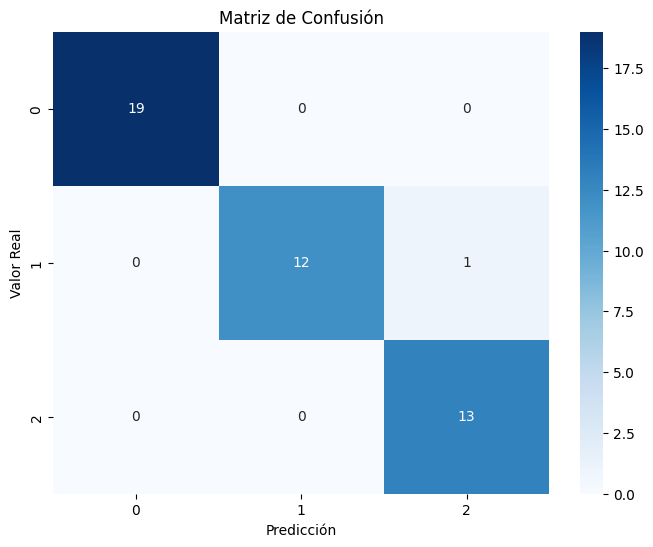

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Creamos y entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizamos predicciones
y_pred = knn.predict(X_test)

# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calculamos y visualizamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

#### Interpretación de resultados

### 6. Visualización avanzada: Animación del impacto de k
Para visualizar el impacto de k en la frontera de decisión de manera dinámica, crearemos una animación utilizando matplotlib.

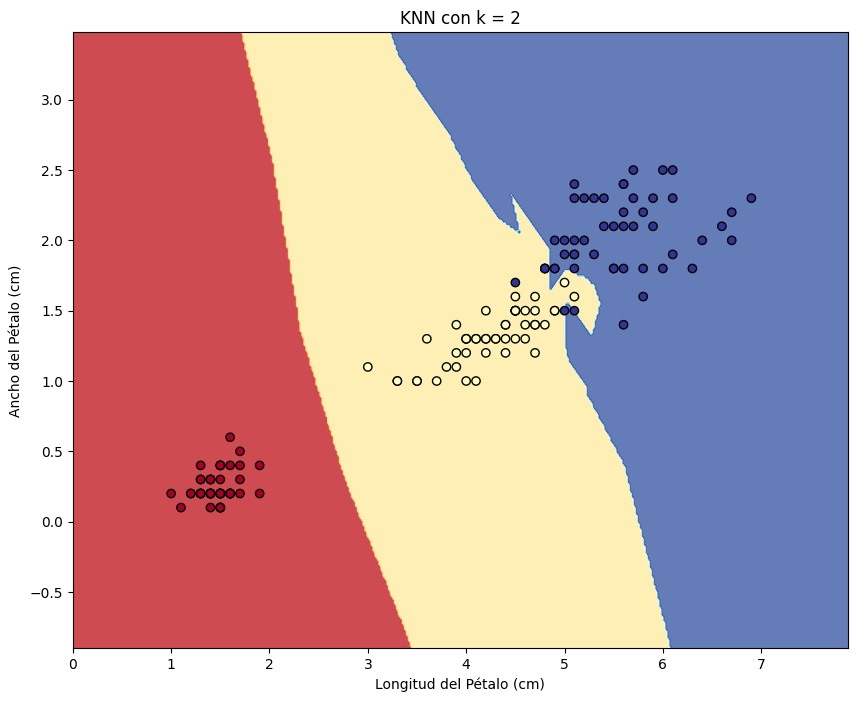

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.neighbors import KNeighborsClassifier

# Creamos una malla de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Función para actualizar la gráfica
def update(frame):
    k = frame + 1
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y_encoded)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.clf()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(f'KNN con k = {k}')
    plt.xlabel('Longitud del Pétalo (cm)')
    plt.ylabel('Ancho del Pétalo (cm)')

# Creamos la animación
fig = plt.figure(figsize=(10, 8))
anim = FuncAnimation(fig, update, frames=range(1, 21), interval=500, repeat=True)

# Guardamos la animación como un gif
anim.save('knn_animation.gif', writer='pillow')